In [1]:
import pandas as pd
import numpy as np 
import datetime 
from vega_datasets import data
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set()

#set figure size 
plt.rcParams['figure.figsize'] = (8,6)

#specify decimal places to display 
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
#convert existing string value to a datetime type 
pd.to_datetime('Jan 1 1970')

Timestamp('1970-01-01 00:00:00')

In [3]:
#what does this do 
try: 
    pd.to_datetime('Jan:1:1970')
except ValueError as e: 
    print('ValueError', e)

ValueError Unknown string format: Jan:1:1970


In [4]:
#using pd.to_datetime to convert entire columns 
#set variable url equal to https
# set df equal to pd.read_csv and place 'url' inside the parenthesis 
#print dataframe datatypes 
#review the head of the dataframe 
url = "https://gist.githubusercontent.com/ryanorsinger/b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv"
df = pd.read_csv(url)
print(df.dtypes)
df.head()


date                   object
coffee_consumption    float64
dtype: object


,date,coffee_consumption
0,2019-01-01,14.30
1,2019-01-02,12.91
2,2019-01-03,10.05
3,2019-01-04,6.35
4,2019-01-07,8.55


In [5]:
#convert our date column to datetime type 
#now 'date' feature has datatype 'datetime64'
df.date = pd.to_datetime(df.date)
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

### Working with DateTime Series

In [6]:
#extract each individual part of the date column and use it to create its own column 
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['weekday'] = df.date.dt.day_name()
df.head()

,date,coffee_consumption,year,month,day,weekday
0,2019-01-01,14.30,2019,1,1,Tuesday
1,2019-01-02,12.91,2019,1,2,Wednesday
2,2019-01-03,10.05,2019,1,3,Thursday
3,2019-01-04,6.35,2019,1,4,Friday
4,2019-01-07,8.55,2019,1,7,Monday


In [7]:
#delete columns 
del df['year']
del df['day']
del df['month']
del df['weekday']

### Datetime Indexes

In [8]:
#once we have a date-time column on a dataframe, we can use that column as the index on our dataframe 
#having a datetime index on our dataframe allows us to use a lot of time series specific functionality within pandas
df = df.set_index('date').sort_index()
df

,coffee_consumption
date,
2019-01-01,14.30
2019-01-02,12.91
2019-01-03,10.05
2019-01-04,6.35
2019-01-07,8.55
...,...
2019-12-25,12.25
2019-12-26,7.51
2019-12-27,9.46


In [9]:
#look at the start of our data 
df.index.min()

Timestamp('2019-01-01 00:00:00')

In [10]:
#look at the end of our data 
df.index.max()

Timestamp('2019-12-31 00:00:00')

In [11]:
#with a datetime index we can access specific subsets 
df['2019-05']

/var/folders/lt/mq77_h29005b8q_dkwt9pz000000gn/T/ipykernel_64206/1696588221.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2019-05']


,coffee_consumption
date,
2019-05-01,9.97
2019-05-02,8.76
2019-05-03,7.79
2019-05-06,13.20
2019-05-07,11.73
2019-05-08,8.50
2019-05-09,11.41
2019-05-10,11.34
2019-05-13,9.52


In [12]:
#or a range of dates 
df['2019-05-06':'2019-05-16']

,coffee_consumption
date,
2019-05-06,13.20
2019-05-07,11.73
2019-05-08,8.50
2019-05-09,11.41
2019-05-10,11.34
2019-05-13,9.52
2019-05-14,6.22
2019-05-15,12.74
2019-05-16,9.17


### Changing the Period 

In [13]:
#want a uniform amount of time between observations in each row 
#increase the granularity of our data 
#decrease the granularity of our data 

### Terms: 
- Upsampling: resampling our data such that it is at a smaller time window, increasing the number of data points. 
- downsampling: resampling our data such that it is at a larger time window, decreasing the number of data points. 

In [14]:
#we now have a larger number of rows 
#each date is one day greater than the next 
#we introduced some nulls into our data 
by_day = df.asfreq('D')
by_day

,coffee_consumption
date,
2019-01-01,14.30
2019-01-02,12.91
2019-01-03,10.05
2019-01-04,6.35
2019-01-05,NaN
...,...
2019-12-27,9.46
2019-12-28,NaN
2019-12-29,NaN


In [15]:
#special method for filling missing values in time series data. 
#either fill the missing values with a specified value 
#fill with the value from the previous observation(forward fill)
#fill with the value from the next observation(back fill)
by_day.assign(
    ffill=lambda df: df.coffee_consumption.ffill(),
    bfill=lambda df: df.coffee_consumption.bfill()
).head(15)

,coffee_consumption,ffill,bfill
date,,,
2019-01-01,14.30,14.30,14.30
2019-01-02,12.91,12.91,12.91
2019-01-03,10.05,10.05,10.05
2019-01-04,6.35,6.35,6.35
2019-01-05,NaN,6.35,8.55
2019-01-06,NaN,6.35,8.55
2019-01-07,8.55,8.55,8.55
2019-01-08,9.41,9.41,9.41
2019-01-09,7.22,7.22,7.22


In [16]:
df = df.fillna(0)

### Resampling

In [17]:
#thought of as a group by operation 
#similar in functionality to .asfreq method 
#resample only works on dataframes with a datetime index 
#example below shows 'every three weeks'
df.resample('3W').mean()

,coffee_consumption
date,
2019-01-06,10.90
2019-01-27,9.74
2019-02-17,10.86
2019-03-10,9.41
2019-03-31,11.06
2019-04-21,10.22
2019-05-12,10.09
2019-06-02,11.05
2019-06-23,9.59


In [18]:
#total coffee consumption for each month 
df.resample('M').sum()

,coffee_consumption
date,
2019-01-31,233.93
2019-02-28,206.04
2019-03-31,219.78
2019-04-30,222.03
2019-05-31,248.48
2019-06-30,183.66
2019-07-31,248.27
2019-08-31,224.01
2019-09-30,215.69


### Reference the pandas Documentation for a full list of valid resampling periods 

<AxesSubplot:xlabel='date'>

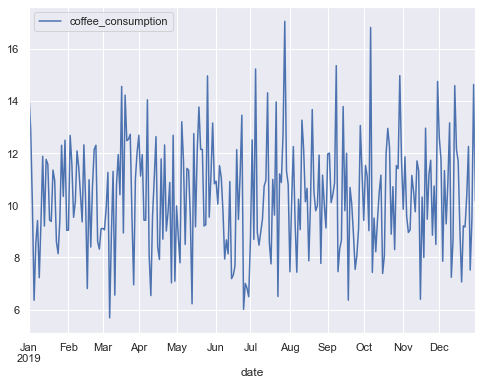

In [19]:
#columns in a dataframe with a datetime index will be plotted as lines with time on the x-axis by simply calling .plot 
df.plot()

<AxesSubplot:xlabel='date'>

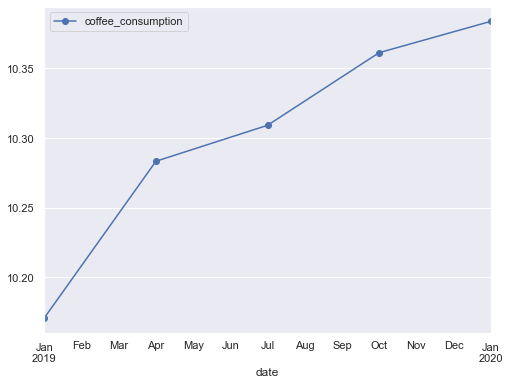

In [20]:
#this will work with resample results as well 
df.resample('3M').mean().plot(marker='o')

### Rolling Windows 
- A Rolling average lets us answer questions like: what was the average over the last 3 days? 

,coffee_consumption,rolling_3,rolling_5,rolling_7
date,,,,
2019-01-06,10.90,NaN,NaN,NaN
2019-01-13,9.28,NaN,NaN,NaN
2019-01-20,10.27,10.15,NaN,NaN
2019-01-27,9.69,9.74,NaN,NaN
2019-02-03,10.64,10.20,10.15,NaN
2019-02-10,11.20,10.51,10.21,NaN
2019-02-17,10.73,10.86,10.50,10.39
2019-02-24,9.81,10.58,10.41,10.23
2019-03-03,9.49,10.01,10.37,10.26


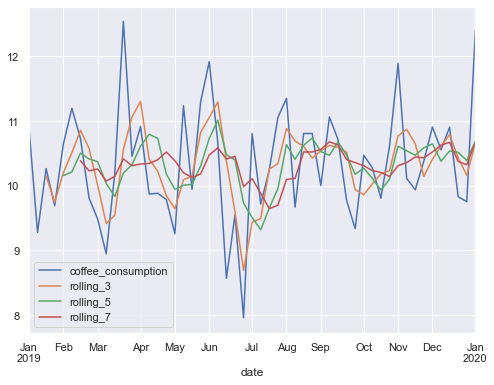

In [21]:
rolling_df = df.resample('W').mean().assign(
    rolling_3=lambda df: df.coffee_consumption.rolling(3).mean(),
    rolling_5=lambda df: df.coffee_consumption.rolling(5).mean(),
    rolling_7=lambda df: df.coffee_consumption.rolling(7).mean(),
)
rolling_df.plot()
rolling_df.head(20)

In [22]:
#get the average per week 
df.resample('W').mean().rolling(4).sum()

,coffee_consumption
date,
2019-01-06,NaN
2019-01-13,NaN
2019-01-20,NaN
2019-01-27,40.13
2019-02-03,39.87
2019-02-10,41.79
2019-02-17,42.26
2019-02-24,42.37
2019-03-03,41.22


### Lagging and Lead 
- .shift: move the data backwards and forwards by a given amount 
- .diff: find the difference with the previous observation(or a specified further back observation )

In [23]:
#shift column one row up: i.e. row one of the index disappears 
df['shift(-1)'] = df.coffee_consumption.shift(-1)
#shift column one row down
df['shift(1)'] = df.coffee_consumption.shift(1)
#shift column three rows down 
df['shift(3)'] = df.coffee_consumption.shift(3)
#imput difference between two columns: difference between row 1 nd 2 is logged in row 2 
#difference between 2 and 3 is logged in row 3 
df['diff(1)'] = df.coffee_consumption.diff(1)
#row 4 minus row 1 
df['diff(3)'] = df.coffee_consumption.diff(3)
df.head(25)

,coffee_consumption,shift(-1),shift(1),shift(3),diff(1),diff(3)
date,,,,,,
2019-01-01,14.30,12.91,NaN,NaN,NaN,NaN
2019-01-02,12.91,10.05,14.30,NaN,-1.40,NaN
2019-01-03,10.05,6.35,12.91,NaN,-2.86,NaN
2019-01-04,6.35,8.55,10.05,14.30,-3.69,-7.95
2019-01-07,8.55,9.41,6.35,12.91,2.19,-4.36
2019-01-08,9.41,7.22,8.55,10.05,0.86,-0.64
2019-01-09,7.22,9.34,9.41,6.35,-2.19,0.86
2019-01-10,9.34,11.87,7.22,8.55,2.12,0.79
2019-01-11,11.87,9.20,9.34,9.41,2.53,2.46


In [24]:
#delete columns created 
for col in ['shift(-1)', 'shift(1)', 'shift(3)', 'diff(1)', 'diff(3)']:
    del df[col]

### Strftime
- The strftime method can be used to format dates in a custom way using format specificiers 

In [25]:
#%B means full month name 
#%d means 2-digit day 
#%Y means the 4 digit year 
df.index.strftime('%B %d, %Y')[:4]

Index(['January 01, 2019', 'January 02, 2019', 'January 03, 2019',
       'January 04, 2019'],
      dtype='object', name='date')

### Timezones 
- To add a timezone to data that has none, use tz_localize. For central time: tz_localize("America/Chicago")
- .tz_localize(None) will remove a timezone
- .tz_convert can be used to convert data from one timezone to another
- df.index.tz is None to check if a dataframe has a timezone set


### TimeDeltas 
- Used to calculate how much time has elapsed between 2 data points

In [26]:
#calculate days between start date and graduation date 
start_date = pd.to_datetime('20190204')
graduation_date = pd.to_datetime('20190614')

days_between = graduation_date - start_date
days_between

Timedelta('130 days 00:00:00')

In [27]:
#convert this TimeDelta object to a number 
days_between // pd.Timedelta('1d')

130

In [28]:
#creates a countdown to final date 
df['days_since_max'] = (df.index.max() - df.index) // pd.Timedelta('1d')
df.tail(10)

,coffee_consumption,days_since_max
date,,
2019-12-18,9.06,13
2019-12-19,7.06,12
2019-12-20,9.21,11
2019-12-23,9.16,8
2019-12-24,10.37,7
2019-12-25,12.25,6
2019-12-26,7.51,5
2019-12-27,9.46,4
2019-12-30,14.62,1


### Data for Exercises

In [29]:
temps = data.sf_temps()
temps

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00
...,...,...
8754,50.40,2010-12-31 19:00:00
8755,49.90,2010-12-31 20:00:00
8756,49.40,2010-12-31 21:00:00
8757,48.80,2010-12-31 22:00:00


### Resample by the day and take the average temperature. Visualize the average temperature over time.

In [30]:
#reset index to date/time 
df = temps.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.80
2010-01-01 01:00:00,47.40
2010-01-01 02:00:00,46.90
2010-01-01 03:00:00,46.50
2010-01-01 04:00:00,46.00


<AxesSubplot:xlabel='date'>

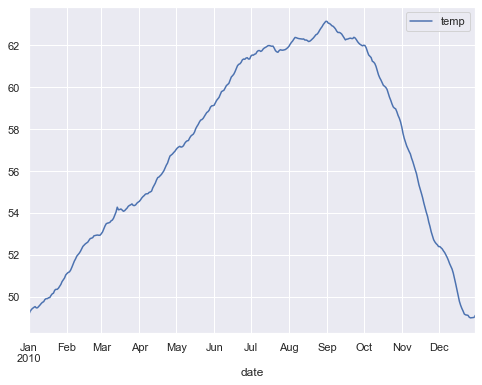

In [31]:
#resample by day 
#take the average temperature 
#plot distribution 
df.resample('D').mean().plot()

<AxesSubplot:xlabel='date'>

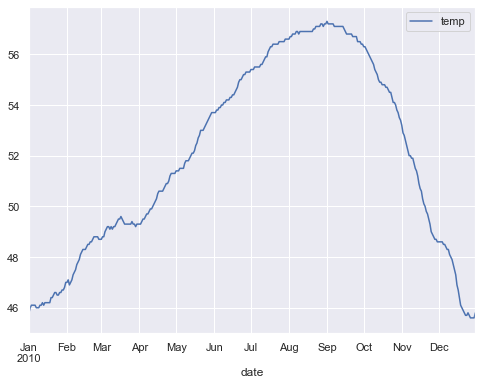

In [32]:
###Write the code necessary to visualize the minimum temperature over time.
#minimum temperature per day 
df.resample('D').min().plot()

<AxesSubplot:xlabel='date'>

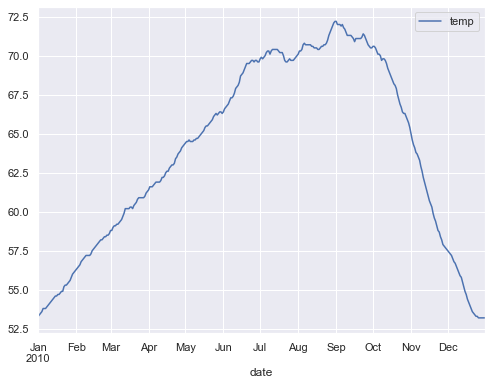

In [33]:
###Write the code necessary to visualize the maximum temperature over time. 
#maximum temperature per day 
df.resample('D').max().plot()

In [34]:
###Which month is the coldest, (on average) temperature? 
df.resample('M').mean().temp.sort_values()

date
2010-01-31   49.98
2010-12-31   50.50
2010-02-28   52.24
2010-03-31   53.96
2010-11-30   55.19
2010-04-30   55.63
2010-05-31   57.97
2010-10-31   60.25
2010-06-30   60.44
2010-07-31   61.77
2010-08-31   62.41
2010-09-30   62.49
Name: temp, dtype: float64

In [35]:
###Which month has the highest average temperature? 
#September has the highest average temperature 
df.resample('M').mean().temp.sort_values(ascending=False)

date
2010-09-30   62.49
2010-08-31   62.41
2010-07-31   61.77
2010-06-30   60.44
2010-10-31   60.25
2010-05-31   57.97
2010-04-30   55.63
2010-11-30   55.19
2010-03-31   53.96
2010-02-28   52.24
2010-12-31   50.50
2010-01-31   49.98
Name: temp, dtype: float64

### Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [36]:
#resample by the day, only storing minimum values per day 
daily = df.temp.resample('D').agg(['min', 'max'])
daily.head()

,min,max
date,,
2010-01-01,45.80,53.30
2010-01-02,46.00,53.40
2010-01-03,46.10,53.50
2010-01-04,46.10,53.60
2010-01-05,46.10,53.80


In [37]:
#which month has the highest daily temperature variability? 
#create a new column for daily temp_diff that hold the difference between max temperatures and minimum temperatures
daily['temp_diff'] = daily['max'] - daily['min']
#create a column for month that includes the month 
daily['month'] = daily.index.strftime('%m-%b')
#groupby month, requesting the maximum temperature difference 
daily.groupby('month').temp_diff.max().sort_values()

month
12-Dec    8.90
01-Jan    9.30
02-Feb    9.90
11-Nov   11.80
03-Mar   12.00
04-Apr   13.00
05-May   13.10
10-Oct   14.40
06-Jun   14.80
07-Jul   14.80
09-Sep   14.90
08-Aug   15.00
Name: temp_diff, dtype: float64

- August has the highest daily temperature variability

### Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date'>

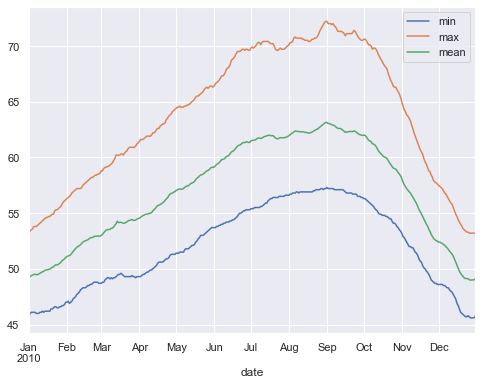

In [38]:
### max, min, mean on the same line 
#specify dataframe.column.resample(time period to resample on).agg(what you want to agg on divided by columns).plot
df.temp.resample('D').agg(['min', 'max', 'mean']).plot()

### Seattle Precipitation 

In [39]:
from vega_datasets import data
temps = data.seattle_weather()

In [40]:
#reset index to date/time 
seattle_weather = temps.set_index('date').sort_index()
seattle_weather.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain
2012-01-04,20.30,12.20,5.60,4.70,rain
2012-01-05,1.30,8.90,2.80,6.10,rain


In [41]:
#create year, month, and day columns 
seattle_weather['year'] = seattle_weather.index.year 
seattle_weather['month'] = seattle_weather.index.month 
seattle_weather['day'] = seattle_weather.index.day 
seattle_weather.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day
date,,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,2012,1,1
2012-01-02,10.90,10.60,2.80,4.50,rain,2012,1,2
2012-01-03,0.80,11.70,7.20,2.30,rain,2012,1,3
2012-01-04,20.30,12.20,5.60,4.70,rain,2012,1,4
2012-01-05,1.30,8.90,2.80,6.10,rain,2012,1,5


### Which year and month combination has the highest precipitation

In [42]:
#resample by month 
#write the column you want to examine in this case precipitation 
#write the math option you want i.e. .sum .max .min etc ()
# .sort_values()
#.tail()
seattle_weather.resample('M').precipitation.sum().sort_values().tail()

date
2012-03-31   183.00
2012-11-30   210.50
2015-11-30   212.60
2014-03-31   240.00
2015-12-31   284.50
Name: precipitation, dtype: float64

- December 2015 had the highest precipitation 

### Visualize the amount of monthly precipitation over time 

year
2012    AxesSubplot(0.125,0.125;0.775x0.755)
2013    AxesSubplot(0.125,0.125;0.775x0.755)
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2015    AxesSubplot(0.125,0.125;0.775x0.755)
Name: precipitation, dtype: object

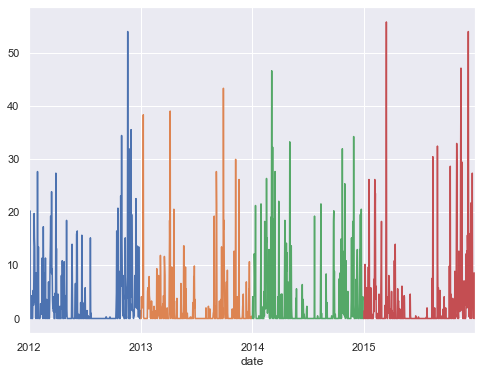

In [43]:
seattle_weather.groupby('year').precipitation.plot()

<AxesSubplot:title={'center':'Monthly Precipitation Totals'}, xlabel='date'>

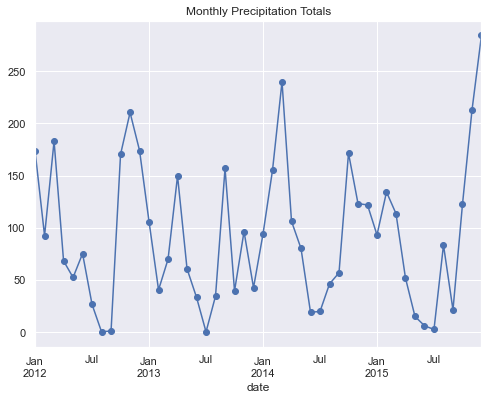

In [44]:
seattle_weather.resample('M').precipitation.sum().plot(marker='o', title = 'Monthly Precipitation Totals')

### Visualize the Amount of Wind over time 

<AxesSubplot:title={'center':'Monthly Wind Totals'}, xlabel='date'>

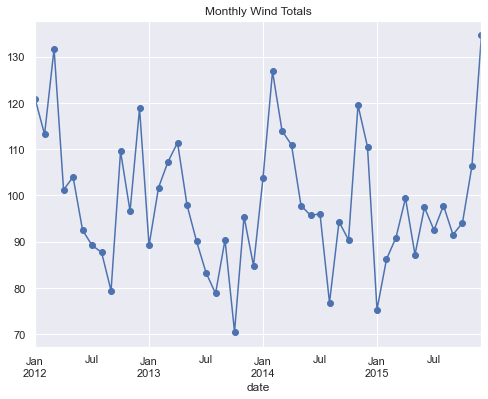

In [45]:
seattle_weather.resample('M').wind.sum().plot(marker='o', title = 'Monthly Wind Totals')

### Which year month combination is the windiest 

In [46]:

seattle_weather.resample('M').wind.mean().sort_values().tail()

date
2012-02-29   3.90
2014-11-30   3.98
2012-03-31   4.25
2015-12-31   4.34
2014-02-28   4.53
Name: wind, dtype: float64

- Windiest year/month comination: February 2014 

### Which year was the sunniest? 


In [47]:
#create a column with a boolean mask to identify only the days that have the specific value 
seattle_weather['sunny'] = seattle_weather.weather == 'sun'
seattle_weather.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day,sunny
date,,,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,2012,1,1,False
2012-01-02,10.90,10.60,2.80,4.50,rain,2012,1,2,False
2012-01-03,0.80,11.70,7.20,2.30,rain,2012,1,3,False
2012-01-04,20.30,12.20,5.60,4.70,rain,2012,1,4,False
2012-01-05,1.30,8.90,2.80,6.10,rain,2012,1,5,False


In [48]:
#first dataframe 
#the groupby function is used to aggregate the years in 'year column'
#the mean is taken 
#values are sorted to find the highest year 
seattle_weather.groupby('year').sunny.mean().sort_values()

year
2012   0.32
2015   0.49
2013   0.56
2014   0.58
Name: sunny, dtype: float64

- 2014 was the sunniest year 

### In which month does it rain the most?

In [49]:
seattle_weather.groupby('month').precipitation.mean().sort_values()

month
7    0.39
6    1.11
8    1.32
5    1.67
9    1.96
4    3.13
2    3.73
1    3.76
10   4.06
3    4.89
12   5.02
11   5.35
Name: precipitation, dtype: float64

- It rains the most in November 

### Which month has the most number of days with a non-zero amount of precipitation?

In [50]:
seattle_weather.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day,sunny
date,,,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,2012,1,1,False
2012-01-02,10.90,10.60,2.80,4.50,rain,2012,1,2,False
2012-01-03,0.80,11.70,7.20,2.30,rain,2012,1,3,False
2012-01-04,20.30,12.20,5.60,4.70,rain,2012,1,4,False
2012-01-05,1.30,8.90,2.80,6.10,rain,2012,1,5,False


In [51]:
seattle_weather['rain'] = seattle_weather.precipitation > 0
seattle_weather.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day,sunny,rain
date,,,,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,2012,1,1,False,False
2012-01-02,10.90,10.60,2.80,4.50,rain,2012,1,2,False,True
2012-01-03,0.80,11.70,7.20,2.30,rain,2012,1,3,False,True
2012-01-04,20.30,12.20,5.60,4.70,rain,2012,1,4,False,True
2012-01-05,1.30,8.90,2.80,6.10,rain,2012,1,5,False,True


In [52]:
seattle_weather.groupby('month').rain.sum().sort_values()

month
7     11
8     22
5     34
9     35
6     37
4     59
10    61
1     66
11    71
2     73
3     73
12    81
Name: rain, dtype: int64

- December has the most number of days with non-zero precipitation

# Flights Data 

In [53]:
flights = data.flights_20k()
flights

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


In [54]:
#reset index to date/time 
df = flights.set_index('date').sort_index()
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


### Convert any negative delays to 0.

In [55]:
df.delay = df.delay.clip(lower = 0)
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


### Which hour of the day has the highest average delay?

In [56]:
df['hour'] = df.index.hour
df.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0
2001-01-01 06:20:00,0,491,BNA,MCI,6
2001-01-01 06:30:00,0,251,MDW,STL,6
2001-01-01 07:00:00,0,361,OAK,ONT,7
2001-01-01 07:00:00,0,303,MSY,HOU,7


In [57]:
df.groupby('hour').delay.mean().sort_values()

hour
5      0.51
6      2.49
7      3.07
8      4.03
9      5.00
10     5.85
11     7.36
12     9.21
14    10.75
13    11.45
15    13.14
17    13.20
16    13.88
18    14.51
19    16.26
20    17.89
21    21.63
22    32.70
23    65.35
0    127.92
1    170.00
3    302.50
Name: delay, dtype: float64

- 3 am has the highest delay 

### Does the day of the week make a difference in the delay amount?

In [58]:
df['day'] = df.index.day_name()
df.head()

,delay,distance,origin,destination,hour,day
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday


In [59]:
df.groupby('day').delay.mean().sort_values()

day
Monday       7.17
Saturday     8.43
Tuesday      9.41
Sunday      10.41
Wednesday   11.03
Thursday    12.82
Friday      17.76
Name: delay, dtype: float64

- Fridays have the highest number of delays 
- Mondays have the least number of delays 

### Does the month make a difference in the delay amount?

In [60]:
df['month'] = df.index.month_name()
df.head()

,delay,distance,origin,destination,hour,day,month
date,,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday,January
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday,January
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday,January
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday,January
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday,January


In [61]:
df.groupby('month').delay.mean().sort_values()

month
March       9.88
January    11.30
February   12.31
Name: delay, dtype: float64

- The month makes a difference in the number of delays 

### Bonus Exercises 

### For each row, calculate the percentage of the year's total that energy source provided.

In [74]:
from vega_datasets import data

In [75]:
ie = data.iowa_electricity()

In [76]:
#examine first five rows of dataset 
ie.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [77]:
ie.year = pd.to_datetime(ie.year, format= '%Y-%m-%d')

In [78]:
#51 rows, 3 columns 
ie.shape

(51, 3)

In [79]:

ie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [80]:
ie = ie.pivot(index= 'year', columns='source')

In [81]:
ie

net_generation                          
source       Fossil Fuels Nuclear Energy Renewables
year                                               
2001-01-01          35361           3853       1437
2002-01-01          35991           4574       1963
2003-01-01          36234           3988       1885
2004-01-01          36205           4929       2102
2005-01-01          36883           4538       2724
2006-01-01          37014           5095       3364
2007-01-01          41389           4519       3870
2008-01-01          42734           5282       5070
2009-01-01          38620           4679       8560
2010-01-01          42750           4451      10308
2011-01-01          39361           5215      11795
2012-01-01          37379           4347      14949
2013-01-01          34873           5321      16476
2014-01-01          35250           4152      17452
2015-01-01          32319           5243      19091
2016-01-01          28437           4703      21241
2017-01-01          29329           5214      21933

In [82]:
#create columns for sources of energy 
ie.columns=['fossil_fuels', 'nuclear_energy', 'renewables']

In [83]:
#create column for total energy that is the summation of the three sources of energy 
ie['total_energy'] = ie.fossil_fuels + ie.nuclear_energy + ie.renewables 

In [84]:
#Create columns for different types of energy percentages 
#type of energy/total energy gives a decimal times 100 will give a percent 
ie['fossil_fuel_percentage'] = (ie.fossil_fuels / ie.total_energy) * 100 
ie['nuclear_energy_percentage'] = (ie.nuclear_energy / ie.total_energy) * 100 
ie['renewables_percentage'] = (ie.renewables / ie.total_energy) * 100 

In [89]:
ie

,fossil_fuels,nuclear_energy,renewables,total_energy,fossil_fuel_percentage,nuclear_energy_percentage,renewables_percentage
year,,,,,,,
2001-01-01,35361,3853,1437,40651,86.99,9.48,3.53
2002-01-01,35991,4574,1963,42528,84.63,10.76,4.62
2003-01-01,36234,3988,1885,42107,86.05,9.47,4.48
2004-01-01,36205,4929,2102,43236,83.74,11.40,4.86
2005-01-01,36883,4538,2724,44145,83.55,10.28,6.17
2006-01-01,37014,5095,3364,45473,81.40,11.20,7.40
2007-01-01,41389,4519,3870,49778,83.15,9.08,7.77
2008-01-01,42734,5282,5070,53086,80.50,9.95,9.55
2009-01-01,38620,4679,8560,51859,74.47,9.02,16.51


### Lineplot of generation over time, color by source

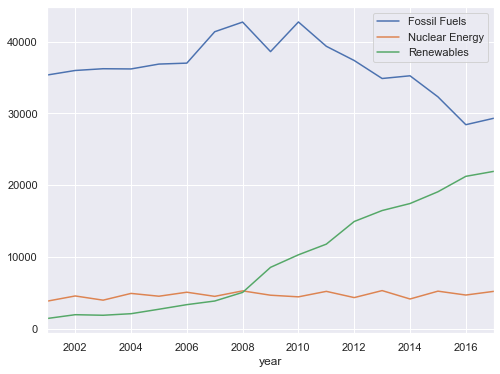

In [86]:
ie.fossil_fuels.plot(label='Fossil Fuels')
ie.nuclear_energy.plot(label='Nuclear Energy')
ie.renewables.plot(label='Renewables')
plt.legend()

### Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [87]:
ie.pivot_table(columns='year')

year,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01
fossil_fuel_percentage,86.99,84.63,86.05,83.74,83.55,81.40,83.15,80.50,74.47,74.34,69.82,65.95,61.54,62.00,57.05,52.29,51.93
fossil_fuels,35361.00,35991.00,36234.00,36205.00,36883.00,37014.00,41389.00,42734.00,38620.00,42750.00,39361.00,37379.00,34873.00,35250.00,32319.00,28437.00,29329.00
nuclear_energy,3853.00,4574.00,3988.00,4929.00,4538.00,5095.00,4519.00,5282.00,4679.00,4451.00,5215.00,4347.00,5321.00,4152.00,5243.00,4703.00,5214.00
nuclear_energy_percentage,9.48,10.76,9.47,11.40,10.28,11.20,9.08,9.95,9.02,7.74,9.25,7.67,9.39,7.30,9.25,8.65,9.23
renewables,1437.00,1963.00,1885.00,2102.00,2724.00,3364.00,3870.00,5070.00,8560.00,10308.00,11795.00,14949.00,16476.00,17452.00,19091.00,21241.00,21933.00
renewables_percentage,3.53,4.62,4.48,4.86,6.17,7.40,7.77,9.55,16.51,17.92,20.92,26.38,29.07,30.70,33.70,39.06,38.84
total_energy,40651.00,42528.00,42107.00,43236.00,44145.00,45473.00,49778.00,53086.00,51859.00,57509.00,56371.00,56675.00,56670.00,56854.00,56653.00,54381.00,56476.00


### Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

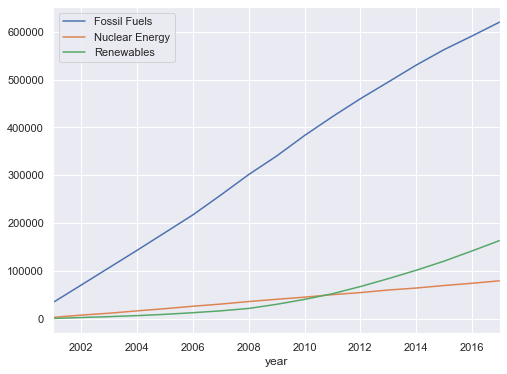

In [88]:
ie.fossil_fuels.cumsum().plot(label='Fossil Fuels')
ie.nuclear_energy.cumsum().plot(label='Nuclear Energy')
ie.renewables.cumsum().plot(label='Renewables')
plt.legend()

### Is the total generation increasing over time?

- Yes 

### How would you control for increasing consumption over time when considering how much energy is coming from each source?

- Conider why the energy is increasing and create initiatives to decrease consumption 
- Energy time of day incentives in pricing 
- Tax Breaks for installing more efficient windows/insulation 
- Marketing for better sustainability practices 

### express each number as a % of the year's total


In [ ]:
#ie.groupby('source').sum()

# San Francisco Temperature Datasets 

### Create 4 categories for temperature: cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

In [94]:
sf = data.sf_temps()

In [95]:
sf.head()

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00


In [96]:
#create a function that converts farenheit to celcius 
def convert_f_to_c(farenheit):
    celcius = [(temp - 32) * 5/9 for temp in farenheit]
    return celcius

In [97]:
sf['celcius'] = convert_f_to_c(sf.temp)

In [98]:
sf.head()

,temp,date,celcius
0,47.80,2010-01-01 00:00:00,8.78
1,47.40,2010-01-01 01:00:00,8.56
2,46.90,2010-01-01 02:00:00,8.28
3,46.50,2010-01-01 03:00:00,8.06
4,46.00,2010-01-01 04:00:00,7.78


In [99]:
sf = sf.set_index('date').sort_index()

In [ ]:
sf.describe()

In [100]:
sf.head()

,temp,celcius
date,,
2010-01-01 00:00:00,47.80,8.78
2010-01-01 01:00:00,47.40,8.56
2010-01-01 02:00:00,46.90,8.28
2010-01-01 03:00:00,46.50,8.06
2010-01-01 04:00:00,46.00,7.78


In [101]:
sf['temperature'] = pd.cut(sf.celcius, bins = [-5, 15, 20, 25, 35], labels=['cold', 'cool', 'warm', 'hot'])

In [102]:
df.head()

,delay,distance,origin,destination,hour,day,month
date,,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday,January
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday,January
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday,January
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday,January
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday,January
